# COGS 108 - EDA Checkpoint

# Names

- Alara Brashears

- Drake Coy

- Luke Sztajnkrycer

- Rohit Mishra

<a id='research_question'></a>
# Research Question

How do tweets from market celebrities/influencers (Elon Musk, Mark Cuban, Jack Dorsey, Vladimir Tenev, Brian Armstrong, Bespoke Crpyto) affect crypto currency investments? More specifically, how do the sentiments of these tweets drive the number and types of investments, and how effective are the tweets of pop-culture figures (e.g. Elon Musk) compared to less-known specialists (e.g. Vladimir Tenev)?

# Setup

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 25

import seaborn as sns
from datetime import date
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#Twitter Data
elon_musk_tweets = pd.read_csv('data/user-tweets-elonmusk.csv')
mark_cuban_tweets = pd.read_csv('data/user-tweets-mcuban.csv')
jack_dorsey_tweets = pd.read_csv('data/user-tweets-jack.csv')
vladimir_tenev_tweets = pd.read_csv('data/user-tweets-vladtenev.csv')
brian_armstrong_tweets = pd.read_csv('data/user-tweets-brian_armstrong.csv')
bespoke_crypto_tweets = pd.read_csv('data/user-tweets-BespokeCrypto.csv')

In [3]:
#Crypto Currecny Data
btc_data = pd.read_csv('data/BTC-USD.csv')
eth_data = pd.read_csv('data/ETH-USD.csv')
xrp_data = pd.read_csv('data/XRP-USD.csv')
doge_data = pd.read_csv('data/DOGE-USD.csv')

# Data Cleaning

We began our data cleaning be examining all of our columns and determining which information would be relevant to answering our research questions. When then dropped any information we deemed irrelevant and then proceeded to clean up our data. Our first cleaning step was to address any nan or missing values, of which there were very little. Then we converted all dates were to be simple strings in a year-month-day format (we are considering using pandas datetime but decide to address that question later during EDA too see which would be more accessible). Then, we changed all of our column titles to be in snake case for continuity thoughout the project. Once our data was cleaned we looked at our twitter and crypto data and combined all of our datasets into shared dataframe in anticipation for analysis (more of this will be done once we begin our EDA).

## Cleaning for Twitter Data

### Data Prep
We found if there were any null values for tweets, and did this for each "influencer's" tweets. 

In [4]:
#Elon as example of data prep process
elon_musk_tweets.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers', 'coordinates',
       'place'],
      dtype='object')

### Column Descriptions:
#### Name - Keeping/Removing - Description

**url** - removing - provides the url to the tweet  
**date** - keeping - provides the date and time for when the tweet was published  
**content** - keeping - the actual text of the tweet  
**renderedContent** - removing - seems to be a direct repeat of 'content'  
**id** - keeping - unique id for each tweet  
**user** - keeping - provides user information including name, username, id, description, verified status, and more  
**outlinks** - removing - indicates any links to outside websites  
**tcooutlinks** - removing - shortend version of links in 'outlinks'  
**replyCount** - keeping - number of replies a tweet recieved  
**retweetCount** - keeping - number of retweets a tweet recieved  
**retweetCount** - keeping - number of retweets a tweet recieved  
**likeCount** - keeping - number of likes a tweet recieved  
**quoteCount** - keeping - number of times a tweet was quoted 
**conversationId** - removing - unique id for the conversation  
**lang** - removing - the language the tweet was made in  
**source** - removing - shows the raw source for where the tweet came from
**sourceURL** - removing - cleaned url from the 'source' column  
**sourceLabel** - removing - cleaned device name for where the tweet came from  
**media** - removing - link to any imbeded photos/videos in the tweet  
**retweetedTweet** - removing - link to original tweeted if this is a retweet  
**quotedTweet** - removing - link to original tweeted if this tweet is quoting another  
**mentionedUsers** - removing - twitter profile information for anyone tagged in the tweet  
**coordinates** - removing - show the gps coordinates of any linked location  
**place** - removing - shows the place of any linked location

In [5]:
#checking for any na values
elon_musk_tweets.isna()['content'].value_counts(), elon_musk_tweets.isna()['date'].value_counts(), \
elon_musk_tweets.isna()['id'].value_counts()

(False    10000
 Name: content, dtype: int64,
 False    10000
 Name: date, dtype: int64,
 False    10000
 Name: id, dtype: int64)

### Dropping Irrelevant Columns

In [6]:
#We found several columns from the dataset description that we decided was not relevant toward the study
columns_to_drop = ['url', 'renderedContent', 'outlinks', 'tcooutlinks', 'conversationId', 'lang', 'source', 
                    'sourceUrl', 'sourceLabel', 'media','retweetedTweet', 'quotedTweet', 'mentionedUsers', 
                    'coordinates','place']
elon_musk_tweets = elon_musk_tweets.drop(columns=columns_to_drop)
mark_cuban_tweets = mark_cuban_tweets.drop(columns=columns_to_drop)
jack_dorsey_tweets = jack_dorsey_tweets.drop(columns=columns_to_drop)
vladimir_tenev_tweets = vladimir_tenev_tweets.drop(columns=columns_to_drop)
brian_armstrong_tweets = brian_armstrong_tweets.drop(columns=columns_to_drop)
bespoke_crypto_tweets = bespoke_crypto_tweets.drop(columns=columns_to_drop)

### Cleaning up Dates

In [7]:
#helper functions to clean up date columns
def year_from_date(date_time):
    year = date_time.split('-')[0]
    return int(year)

def month_from_date(date_time):
    month = date_time.split('-')[1]
    return int(month)

def day_from_date(date_time):
    date = date_time.split(' ')[0]
    day = date.split('-')[2]
    return int(day)

def date_from_date(date_time):
    date = date_time.split(' ')[0]
    return date

def time_from_date(date_time):
    date = date_time.split(' ')[1].split('+')[0]
    return date

In [8]:
#Applying date functions to create columns for year/month/day
#Elon Musk
elon_musk_tweets = elon_musk_tweets.assign(year = elon_musk_tweets.date.apply(year_from_date))
elon_musk_tweets = elon_musk_tweets.assign(month = elon_musk_tweets.date.apply(month_from_date))
elon_musk_tweets = elon_musk_tweets.assign(day = elon_musk_tweets.date.apply(day_from_date))
elon_musk_tweets = elon_musk_tweets.assign(time = elon_musk_tweets.date.apply(time_from_date))
elon_musk_tweets = elon_musk_tweets.assign(date = elon_musk_tweets.date.apply(date_from_date))
elon_musk_tweets['date'] = pd.to_datetime(elon_musk_tweets['date'])

#Mark Cuban
mark_cuban_tweets = mark_cuban_tweets.assign(year = mark_cuban_tweets.date.apply(year_from_date))
mark_cuban_tweets = mark_cuban_tweets.assign(month = mark_cuban_tweets.date.apply(month_from_date))
mark_cuban_tweets = mark_cuban_tweets.assign(day = mark_cuban_tweets.date.apply(day_from_date))
mark_cuban_tweets = mark_cuban_tweets.assign(time = mark_cuban_tweets.date.apply(time_from_date))
mark_cuban_tweets = mark_cuban_tweets.assign(date = mark_cuban_tweets.date.apply(date_from_date))
mark_cuban_tweets['date'] = pd.to_datetime(mark_cuban_tweets['date'])

#Jack Dorsey
jack_dorsey_tweets = jack_dorsey_tweets.assign(year = jack_dorsey_tweets.date.apply(year_from_date))
jack_dorsey_tweets = jack_dorsey_tweets.assign(month = jack_dorsey_tweets.date.apply(month_from_date))
jack_dorsey_tweets = jack_dorsey_tweets.assign(day = jack_dorsey_tweets.date.apply(day_from_date))
jack_dorsey_tweets = jack_dorsey_tweets.assign(time = jack_dorsey_tweets.date.apply(time_from_date))
jack_dorsey_tweets = jack_dorsey_tweets.assign(date = jack_dorsey_tweets.date.apply(date_from_date))
jack_dorsey_tweets['date'] = pd.to_datetime(jack_dorsey_tweets['date'])

#Vladimir Tenev
vladimir_tenev_tweets = vladimir_tenev_tweets.assign(year = vladimir_tenev_tweets.date.apply(year_from_date))
vladimir_tenev_tweets = vladimir_tenev_tweets.assign(month = vladimir_tenev_tweets.date.apply(month_from_date))
vladimir_tenev_tweets = vladimir_tenev_tweets.assign(day = vladimir_tenev_tweets.date.apply(day_from_date))
vladimir_tenev_tweets = vladimir_tenev_tweets.assign(time = vladimir_tenev_tweets.date.apply(time_from_date))
vladimir_tenev_tweets = vladimir_tenev_tweets.assign(date = vladimir_tenev_tweets.date.apply(date_from_date))
vladimir_tenev_tweets['date'] = pd.to_datetime(vladimir_tenev_tweets['date'])

#Brian Armstrong
brian_armstrong_tweets = brian_armstrong_tweets.assign(year = brian_armstrong_tweets.date.apply(year_from_date))
brian_armstrong_tweets = brian_armstrong_tweets.assign(month = brian_armstrong_tweets.date.apply(month_from_date))
brian_armstrong_tweets = brian_armstrong_tweets.assign(day = brian_armstrong_tweets.date.apply(day_from_date))
brian_armstrong_tweets = brian_armstrong_tweets.assign(time = brian_armstrong_tweets.date.apply(time_from_date))
brian_armstrong_tweets = brian_armstrong_tweets.assign(date = brian_armstrong_tweets.date.apply(date_from_date))
brian_armstrong_tweets['date'] = pd.to_datetime(brian_armstrong_tweets['date'])

#Bespoke Crypto
bespoke_crypto_tweets = bespoke_crypto_tweets.assign(year = bespoke_crypto_tweets.date.apply(year_from_date))
bespoke_crypto_tweets = bespoke_crypto_tweets.assign(month = bespoke_crypto_tweets.date.apply(month_from_date))
bespoke_crypto_tweets = bespoke_crypto_tweets.assign(day = bespoke_crypto_tweets.date.apply(day_from_date))
bespoke_crypto_tweets = bespoke_crypto_tweets.assign(time = bespoke_crypto_tweets.date.apply(time_from_date))
bespoke_crypto_tweets = bespoke_crypto_tweets.assign(date = bespoke_crypto_tweets.date.apply(date_from_date))
bespoke_crypto_tweets['date'] = pd.to_datetime(bespoke_crypto_tweets['date'])

### Cleaning up User Column information

In [9]:
#helper function to pull username from dictionary of user information
def get_display_name(user):
    name = user.split(',')[1].split("'")[3]
    return name

In [10]:
#Appling username helper function to simplify user column data
#Elon Musk
elon_musk_tweets = elon_musk_tweets.assign(user = elon_musk_tweets.user.apply(get_display_name))

#Mark Cuban
mark_cuban_tweets = mark_cuban_tweets.assign(user = mark_cuban_tweets.user.apply(get_display_name))

#Jack Dorsey
jack_dorsey_tweets = jack_dorsey_tweets.assign(user = jack_dorsey_tweets.user.apply(get_display_name))

#Vladimir Tenev
vladimir_tenev_tweets = vladimir_tenev_tweets.assign(user = vladimir_tenev_tweets.user.apply(get_display_name))

#Brian Armstrong
brian_armstrong_tweets = brian_armstrong_tweets.assign(user = brian_armstrong_tweets.user.apply(get_display_name))

#Bespoke Crypto
bespoke_crypto_tweets = bespoke_crypto_tweets.assign(user = bespoke_crypto_tweets.user.apply(get_display_name))

### We are only interested in tweets dating back to 2018 --> Drop earlier dates

In [11]:
#Elon Musk
elon_musk_tweets = elon_musk_tweets[elon_musk_tweets.get('year') >= 2018]

#Mark Cuban
mark_cuban_tweets = mark_cuban_tweets[mark_cuban_tweets.get('year') >= 2018]

#Jack Dorsey
jack_dorsey_tweets = jack_dorsey_tweets[jack_dorsey_tweets.get('year') >= 2018]

#Vladimir Tenev
vladimir_tenev_tweets = vladimir_tenev_tweets[vladimir_tenev_tweets.get('year') >= 2018]

#Brian Armstrong
brian_armstrong_tweets = brian_armstrong_tweets[brian_armstrong_tweets.get('year') >= 2018]

#Bespoke Crypto
bespoke_crypto_tweets = bespoke_crypto_tweets[bespoke_crypto_tweets.get('year') >= 2018]

### Rename all column headers to standard snake_case

In [12]:
elon_musk_tweets.columns

Index(['date', 'content', 'id', 'user', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'year', 'month', 'day', 'time'],
      dtype='object')

In [13]:
elon_musk_tweets = elon_musk_tweets.rename({'replyCount':'reply_count', 'likeCount':'like_count', 'quoteCount':'quote_count', 'retweetCount':'retweet_count'}, axis='columns')
mark_cuban_tweets = mark_cuban_tweets.rename({'replyCount':'reply_count', 'likeCount':'like_count', 'quoteCount':'quote_count', 'retweetCount':'retweet_count'}, axis='columns')
jack_dorsey_tweets = jack_dorsey_tweets.rename({'replyCount':'reply_count', 'likeCount':'like_count', 'quoteCount':'quote_count', 'retweetCount':'retweet_count'}, axis='columns')
vladimir_tenev_tweets = vladimir_tenev_tweets.rename({'replyCount':'reply_count', 'likeCount':'like_count', 'quoteCount':'quote_count', 'retweetCount':'retweet_count'}, axis='columns')
brian_armstrong_tweets = brian_armstrong_tweets.rename({'replyCount':'reply_count', 'likeCount':'like_count', 'quoteCount':'quote_count', 'retweetCount':'retweet_count'}, axis='columns')
bespoke_crypto_tweets = bespoke_crypto_tweets.rename({'replyCount':'reply_count', 'likeCount':'like_count', 'quoteCount':'quote_count', 'retweetCount':'retweet_count'}, axis='columns')

In [14]:
bespoke_crypto_tweets.head()

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2018-04-13,"Despite the last two day's bounce, adequate sc...",984796747707887619,Bespoke Crypto,0,0,2,0,2018,4,13,14:13:35
1,2018-03-26,#Bitcoin futures are trading in contango. http...,978384733364252672,Bespoke Crypto,2,3,4,1,2018,3,26,21:34:32
2,2018-03-16,The first bitcoin mining ban?\r\n\r\nhttps://t...,974766693682688000,Bespoke Crypto,0,0,0,0,2018,3,16,21:57:44
3,2018-03-07,Recent price action could also possibly be exp...,971444160485117957,Bespoke Crypto,0,0,0,0,2018,3,7,17:55:11
4,2018-03-07,A popular trading bot used on Binance has been...,971432353326301189,Bespoke Crypto,0,0,1,0,2018,3,7,17:08:16


### Combine all Influencer's tweets into a common dataframe

In [15]:
tweets = (elon_musk_tweets.merge(mark_cuban_tweets, how='outer')
                        .merge(jack_dorsey_tweets, how='outer')
                        .merge(vladimir_tenev_tweets, how='outer')
                        .merge(brian_armstrong_tweets, how='outer')
                        .merge(bespoke_crypto_tweets, how='outer'))
tweets['date'] = pd.to_datetime(tweets['date'])

In [16]:
#check to make sure all tweets were preserved during the merge
total_num_tweet = elon_musk_tweets.shape[0] + mark_cuban_tweets.shape[0] + jack_dorsey_tweets.shape[0] \
                    + vladimir_tenev_tweets.shape[0] + brian_armstrong_tweets.shape[0] \
                    + bespoke_crypto_tweets.shape[0]
total_num_tweet == tweets.shape[0]

True

### Final Cleaned Twitter Datasets

In [17]:
#Only showed Elon Musk's dataset considering all others are the same
elon_musk_tweets.head()

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2021-05-03,@MeetLuis @WARREZ420 @WholeMarsBlog Rawlinson ...,1389270326073253889,Elon Musk,368,219,2281,100,2021,5,3,17:27:11
1,2021-05-03,@spacex360 So great to see the happy faces!,1389126650508480512,Elon Musk,774,943,29807,42,2021,5,3,07:56:16
2,2021-05-03,"@utsavtechie Prototypes are easy, production i...",1389102532706848768,Elon Musk,2791,8029,159645,648,2021,5,3,06:20:26
3,2021-05-02,@heydave7 @Tesla A remarkable junction in history,1388980879175954433,Elon Musk,918,865,16742,71,2021,5,2,22:17:02
4,2021-05-02,@jaentwistle One of many reasons why we need l...,1388963849043419140,Elon Musk,1152,1474,32663,78,2021,5,2,21:09:21


In [18]:
#Combined dataset with all influencers in it. Looks exact same as above but is much larger.
tweets.head()

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2021-05-03,@MeetLuis @WARREZ420 @WholeMarsBlog Rawlinson ...,1389270326073253889,Elon Musk,368,219,2281,100,2021,5,3,17:27:11
1,2021-05-03,@spacex360 So great to see the happy faces!,1389126650508480512,Elon Musk,774,943,29807,42,2021,5,3,07:56:16
2,2021-05-03,"@utsavtechie Prototypes are easy, production i...",1389102532706848768,Elon Musk,2791,8029,159645,648,2021,5,3,06:20:26
3,2021-05-02,@heydave7 @Tesla A remarkable junction in history,1388980879175954433,Elon Musk,918,865,16742,71,2021,5,2,22:17:02
4,2021-05-02,@jaentwistle One of many reasons why we need l...,1388963849043419140,Elon Musk,1152,1474,32663,78,2021,5,2,21:09:21


In [19]:
elon_musk_tweets.shape, tweets.shape

((9502, 12), (15975, 12))

## Cleaning for Crypto Currency Data

### Column Descriptions:
#### Name - Keeping/Removing - Description

**Date** - keeping - the date. We took data for each day the market was open since 2018 (Jan 1) until yesterday (4/27/2021). We picked 4/27 because some of the cryptocurrencies didn't have data available for today yet.  
**Open** - keeping - The price of the cryptocurrency when the market opens for the day.  
**High** - keeping - The highest price of the cryptocurrency for a given day.  
**Low** - keeping - The lowest price of the cryptocurrency for a given day.  
**Close** - keeping - The price of the cryptocurrency when the market closes for the day.  
**Adj Close** - keeping - Stands for adjusted closing price. The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. These appear to be the same as the normal closing price (Close).  
**Volume** - keeping - The amount of the cryptocurrency traded. More specifically, the volume is the value of all transactions for the given day.  

In [20]:
#checking to find an na values
doge_na = doge_data.isna()
doge_na['Open'].value_counts()

False    1209
True        4
Name: Open, dtype: int64

In [21]:
# The four na values above are the exact same dates across all 4 of our crypto data sets, we assume there was an issue with Yahoo Finance during these days such that the values
# didnt get recorded. We are planning to keep these values in so there is date continuity but were will not use them in our analysis.

In [22]:
#make a new column for daily price change
btc_data['price change'] = btc_data['Close'] - btc_data['Open']
eth_data['price change'] = eth_data['Close'] - eth_data['Open']
xrp_data['price change'] = xrp_data['Close'] - xrp_data['Open']
doge_data['price change'] = doge_data['Close'] - doge_data['Open']
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price change
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,-455.000000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,1357.099609
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,222.799805
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,328.500000
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,1952.299805


In [23]:
#make a new column for daily percent price change
btc_data['percent_price_change'] = (btc_data['Close'] / btc_data['Open']) -1
eth_data['percent_price_change'] = (eth_data['Close'] / eth_data['Open']) -1
xrp_data['percent_price_change'] = (xrp_data['Close'] / xrp_data['Open']) -1
doge_data['percent_price_change'] = (doge_data['Close'] / doge_data['Open']) -1

### Change the Column names to standardized snake case

In [24]:
btc_data = btc_data.rename({'Date':'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Adj Close':'adj_close', 'Volume':'volume', 'price change':'price_change'}, axis='columns')
eth_data = eth_data.rename({'Date':'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Adj Close':'adj_close', 'Volume':'volume', 'price change':'price_change'}, axis='columns')
xrp_data = xrp_data.rename({'Date':'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Adj Close':'adj_close', 'Volume':'volume', 'price change':'price_change'}, axis='columns')
doge_data = doge_data.rename({'Date':'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Adj Close':'adj_close', 'Volume':'volume', 'price change':'price_change'}, axis='columns')

In [25]:
#dataframe of closing prices by day:
#we know for sure that bitcoin has all the dates we want, so I'll just use the dates from the btc dataframe.
closing_prices = [btc_data['date'], btc_data['close'], eth_data['close'], xrp_data['close'], doge_data['close']]
closing_prices_headers = ['date', 'btc_price', 'eth_price', 'xrp_price', 'doge_price']

price_by_day = pd.concat(closing_prices, axis = 1, keys = closing_prices_headers)
price_by_day.head()

,date,btc_price,eth_price,xrp_price,doge_price
0,2018-01-01,13657.200195,772.640991,2.39103,0.008909
1,2018-01-02,14982.099609,884.443970,2.48090,0.009145
2,2018-01-03,15201.000000,962.719971,3.10537,0.009320
3,2018-01-04,15599.200195,980.921997,3.19663,0.009644
4,2018-01-05,17429.500000,997.719971,3.04871,0.012167


In [26]:
#Dataframe of price changes by day
closing_changes = [btc_data['date'], btc_data['price_change'], eth_data['price_change'], xrp_data['price_change'], doge_data['price_change']]
closing_changes_headers = ['date', 'btc_change', 'eth_change', 'xrp_change', 'doge_change']

change_by_day = pd.concat(closing_changes, axis = 1, keys = closing_changes_headers)
change_by_day.head()

,date,btc_change,eth_change,xrp_change,doge_change
0,2018-01-01,-455.000000,16.883972,0.09501,-0.000122
1,2018-01-02,1357.099609,112.097962,0.11142,0.000272
2,2018-01-03,222.799805,76.719971,0.64127,0.000232
3,2018-01-04,328.500000,19.208984,0.07929,0.000298
4,2018-01-05,1952.299805,21.969971,-0.25210,0.002507


### Change the Date column to datetime

In [27]:
btc_data['date'] = pd.to_datetime(btc_data['date'])
eth_data['date'] = pd.to_datetime(eth_data['date'])
xrp_data['date'] = pd.to_datetime(xrp_data['date'])
doge_data['date'] = pd.to_datetime(doge_data['date'])

### Final Cleaned Crypto Currency Datasets

In [28]:
#Only showed Bitcoin dataset considering all others are the same
btc_data.head()

,date,open,high,low,close,adj_close,volume,price_change,percent_price_change
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,-455.000000,-0.032242
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,1357.099609,0.099604
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,222.799805,0.014875
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,328.500000,0.021512
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,1952.299805,0.126140


In [29]:
#Combined Dataset showing only the closing prices per day for each currency
price_by_day.head()

,date,btc_price,eth_price,xrp_price,doge_price
0,2018-01-01,13657.200195,772.640991,2.39103,0.008909
1,2018-01-02,14982.099609,884.443970,2.48090,0.009145
2,2018-01-03,15201.000000,962.719971,3.10537,0.009320
3,2018-01-04,15599.200195,980.921997,3.19663,0.009644
4,2018-01-05,17429.500000,997.719971,3.04871,0.012167


In [30]:
#Combined Dataset showing only the change in price per day for each currency
price_by_day.head()

,date,btc_price,eth_price,xrp_price,doge_price
0,2018-01-01,13657.200195,772.640991,2.39103,0.008909
1,2018-01-02,14982.099609,884.443970,2.48090,0.009145
2,2018-01-03,15201.000000,962.719971,3.10537,0.009320
3,2018-01-04,15599.200195,980.921997,3.19663,0.009644
4,2018-01-05,17429.500000,997.719971,3.04871,0.012167


# Data Analysis & Results (EDA)

EDA carried out over multiple sections, with descriptions of our work given in intervals as we move through the process.

### General Information about Data

#### Tweets

In [31]:
#we have gathered a total of 16,103 different tweets
tweets.shape

(15975, 12)

In [32]:
tweets.describe()

,id,reply_count,retweet_count,like_count,quote_count,year,month,day
count,1.597500e+04,15975.000000,15975.000000,1.597500e+04,15975.000000,15975.000000,15975.000000,15975.000000
mean,1.181054e+18,592.190172,1708.377966,1.714294e+04,230.580720,2019.285446,6.262222,15.803568
std,1.250672e+17,2485.308815,8670.991723,6.102316e+04,1261.940805,0.970981,3.434341,8.720704
min,9.478852e+17,0.000000,0.000000,0.000000e+00,0.000000,2018.000000,1.000000,1.000000
25%,1.075581e+18,21.000000,17.000000,2.525000e+02,4.000000,2018.000000,3.000000,8.000000
50%,1.186369e+18,75.000000,73.000000,1.361000e+03,13.000000,2019.000000,6.000000,16.000000
75%,1.287494e+18,257.000000,355.000000,6.495000e+03,58.000000,2020.000000,9.000000,23.000000
max,1.389335e+18,60647.000000,360079.000000,1.588120e+06,43539.000000,2021.000000,12.000000,31.000000


In [33]:
#From our data Elon Musk has tweeted nearly 3 time more than our next influencer, Jack Dorsey
tweets.groupby('user').count().sort_values(by='date', ascending=False)

,date,content,id,reply_count,retweet_count,like_count,quote_count,year,month,day,time
user,,,,,,,,,,,
Elon Musk,9502,9502,9502,9502,9502,9502,9502,9502,9502,9502,9502
jack,3355,3355,3355,3355,3355,3355,3355,3355,3355,3355,3355
Mark Cuban,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635
VLAD,239,239,239,239,239,239,239,239,239,239,239
Brian Armstrong,185,185,185,185,185,185,185,185,185,185,185
Bespoke Crypto,59,59,59,59,59,59,59,59,59,59,59


#### Crypto

In [34]:
#Good, we can see that there is a total number of 1213 days of data that we scrapped
btc_data.shape, eth_data.shape, doge_data.shape, xrp_data.shape

((1213, 9), (1213, 9), (1213, 9), (1213, 9))

In [35]:
btc_data.describe()

,open,high,low,close,adj_close,volume,price_change,percent_price_change
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000
mean,12472.718250,12805.557091,12117.562416,12504.622082,12504.622082,2.290413e+10,31.903832,0.001846
std,12499.031202,12902.109076,12056.858533,12556.029973,12556.029973,2.135968e+10,717.750904,0.039384
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09,-5380.503907,-0.371869
25%,6643.100098,6774.750000,6540.049316,6642.640137,6642.640137,6.639190e+09,-127.277832,-0.014318
50%,8788.541992,8956.906250,8569.643555,8787.786133,8787.786133,1.760379e+10,9.520019,0.001294
75%,10933.752930,11204.327148,10620.278320,10923.627930,10923.627930,3.169229e+10,166.583985,0.017656
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11,7309.636719,0.187972


In [36]:
eth_data.describe()

,open,high,low,close,adj_close,volume,price_change,percent_price_change
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000
mean,456.294667,472.622511,438.447325,457.748033,457.748033,1.019365e+10,1.453366,0.002161
std,475.445462,496.023492,453.936526,479.472345,479.472345,9.800409e+09,35.531380,0.050394
min,84.279694,85.342743,82.829887,84.308296,84.308296,9.484880e+08,-261.113525,-0.423089
25%,175.906891,180.145218,171.826599,175.992889,175.992889,2.606882e+09,-5.178902,-0.021120
50%,244.185928,248.236282,236.765305,244.179321,244.179321,7.494329e+09,0.168380,0.000983
75%,516.148010,527.193970,494.066010,516.036011,516.036011,1.330832e+10,7.709503,0.025970
max,2534.031250,2676.392822,2485.375000,2662.865234,2662.865234,6.073363e+10,215.003662,0.259513


In [37]:
doge_data.describe()

,open,high,low,close,adj_close,volume,price_change,percent_price_change
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000
mean,0.009637,0.010635,0.008825,0.009830,0.009830,5.219802e+08,0.000194,0.004504
std,0.031762,0.036934,0.027133,0.032634,0.032634,3.060314e+09,0.007517,0.078448
min,0.001540,0.001612,0.001247,0.001537,0.001537,2.134170e+06,-0.088935,-0.397987
25%,0.002427,0.002493,0.002363,0.002427,0.002427,1.801539e+07,-0.000065,-0.021297
50%,0.002811,0.002897,0.002742,0.002810,0.002810,4.663146e+07,-0.000004,-0.001239
75%,0.003858,0.004204,0.003676,0.003851,0.003851,1.152550e+08,0.000054,0.017624
max,0.408435,0.437700,0.309080,0.407318,0.407318,6.941068e+10,0.184283,1.014847


In [38]:
xrp_data.describe()

,open,high,low,close,adj_close,volume,price_change,percent_price_change
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000
mean,0.431290,0.450702,0.409958,0.430510,0.430510,2.544348e+09,-0.000779,0.001471
std,0.345594,0.377080,0.310761,0.342245,0.342245,4.143412e+09,0.054223,0.063545
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.348410e+08,-0.907360,-0.422720
25%,0.252284,0.258081,0.245585,0.251943,0.251943,6.479056e+08,-0.007782,-0.022264
50%,0.315186,0.322413,0.308660,0.315310,0.315310,1.270017e+09,-0.000355,-0.001211
75%,0.474858,0.492477,0.458831,0.474764,0.474764,2.299595e+09,0.006609,0.019925
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10,0.641270,0.560308


Over all, there is a lot of interesting information that we can determine from this info.
1. Per coin price in descending order: BTC > ETH > XRP > DOGE
2. 4 Days of prices were not recorded by Yahoo finances (Explained why earlier)
3. BTC has the highest price volitility as shown by its large mean price change

### Begin looking more indepth at our twitter data

In [39]:
tweets_per_day = tweets.groupby(by=['date']).count().reset_index()
tweets_per_day

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2018-01-01,2,2,2,2,2,2,2,2,2,2,2
1,2018-01-02,3,3,3,3,3,3,3,3,3,3,3
2,2018-01-03,8,8,8,8,8,8,8,8,8,8,8
3,2018-01-04,3,3,3,3,3,3,3,3,3,3,3
4,2018-01-05,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2021-04-29,28,28,28,28,28,28,28,28,28,28,28
1191,2021-04-30,9,9,9,9,9,9,9,9,9,9,9
1192,2021-05-01,6,6,6,6,6,6,6,6,6,6,6
1193,2021-05-02,18,18,18,18,18,18,18,18,18,18,18


<AxesSubplot:xlabel='date', ylabel='content'>

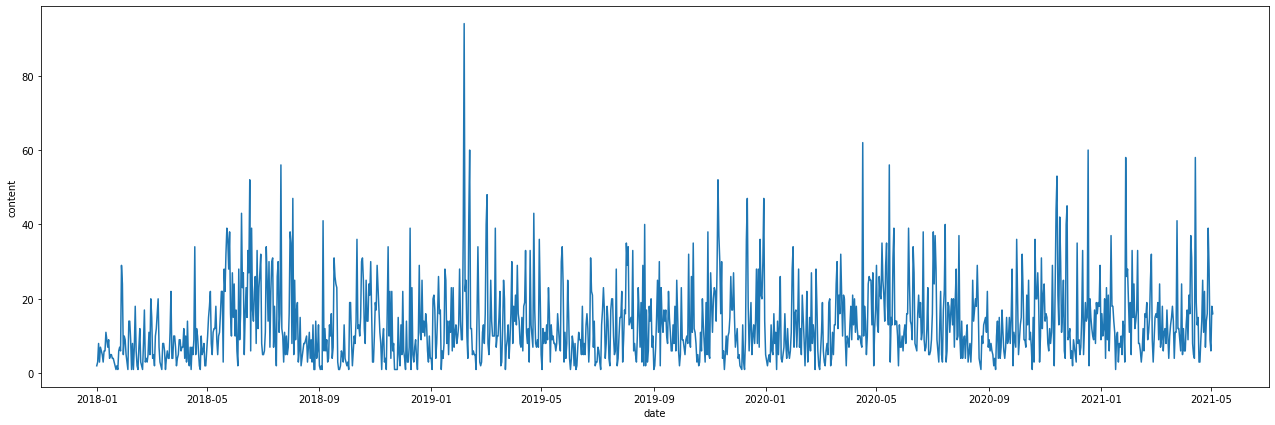

In [40]:
#We can see that there has been a fairly steady amount of tweets across our data set
fig, ax = plt.subplots(figsize=(22,7))
sns.lineplot(data=tweets_per_day, x='date', y='content')

Text(0.5, 1.0, 'Bespoke Cryptos Tweets')

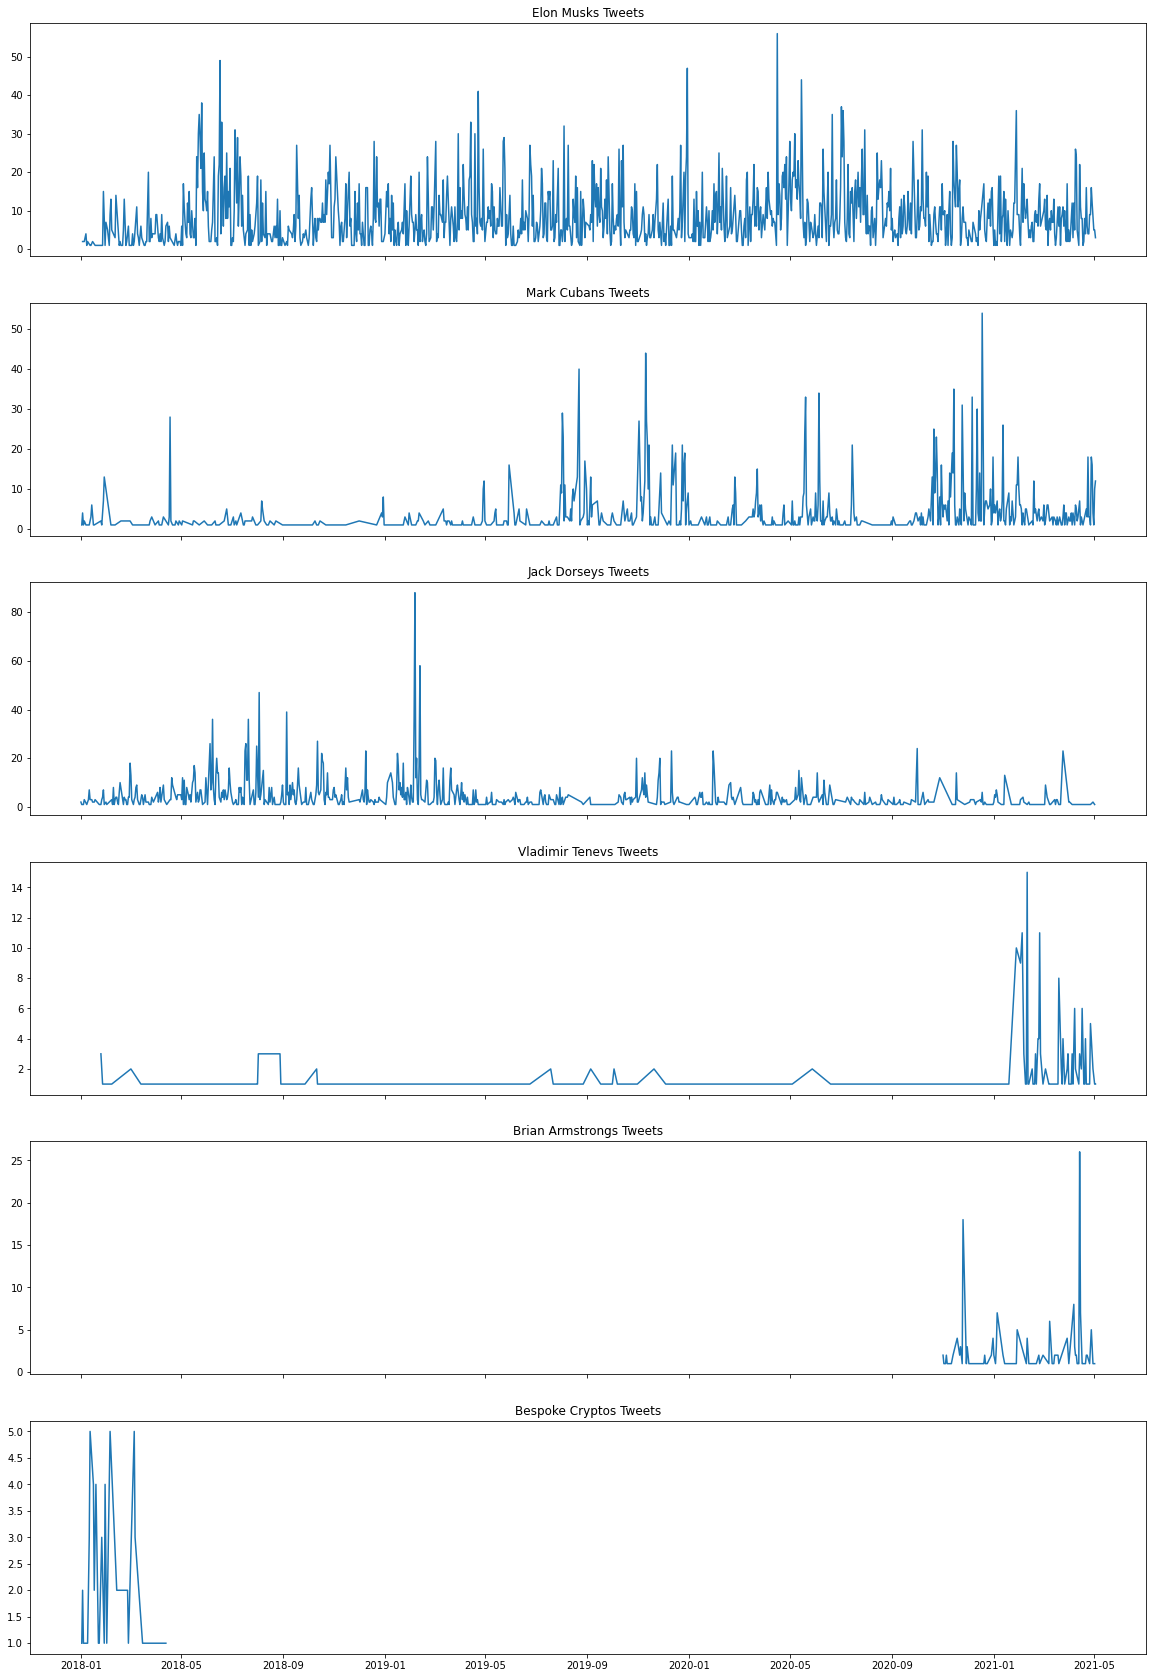

In [41]:
#Wanted to visualize the frequency with which everyone was tweeting
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, figsize=(20,30), sharex=True)

ax1.plot('date', 'content', data=elon_musk_tweets.groupby('date').count().reset_index())
ax1.set_title('Elon Musks Tweets')

ax2.plot('date', 'content', data=mark_cuban_tweets.groupby('date').count().reset_index())
ax2.set_title('Mark Cubans Tweets')

ax3.plot('date', 'content', data=jack_dorsey_tweets.groupby('date').count().reset_index())
ax3.set_title('Jack Dorseys Tweets')

ax4.plot('date', 'content', data=vladimir_tenev_tweets.groupby('date').count().reset_index())
ax4.set_title('Vladimir Tenevs Tweets')

ax5.plot('date', 'content', data=brian_armstrong_tweets.groupby('date').count().reset_index())
ax5.set_title('Brian Armstrongs Tweets')

ax6.plot('date', 'content', data=bespoke_crypto_tweets.groupby('date').count().reset_index())
ax6.set_title('Bespoke Cryptos Tweets')


Not all of our influencers have been active on twitter for the entire three year span we are looking at. Brian Armstrong first started tweeting in late 2020 and Bespoke Crypto has only tweeted in 2018. This is definetly worth noting and it might be worth removing these two users in order to stay consistent.

### Visual of Crypto Prices Over Time

Text(0.5, 1.0, 'BTC Daily Closing Price')

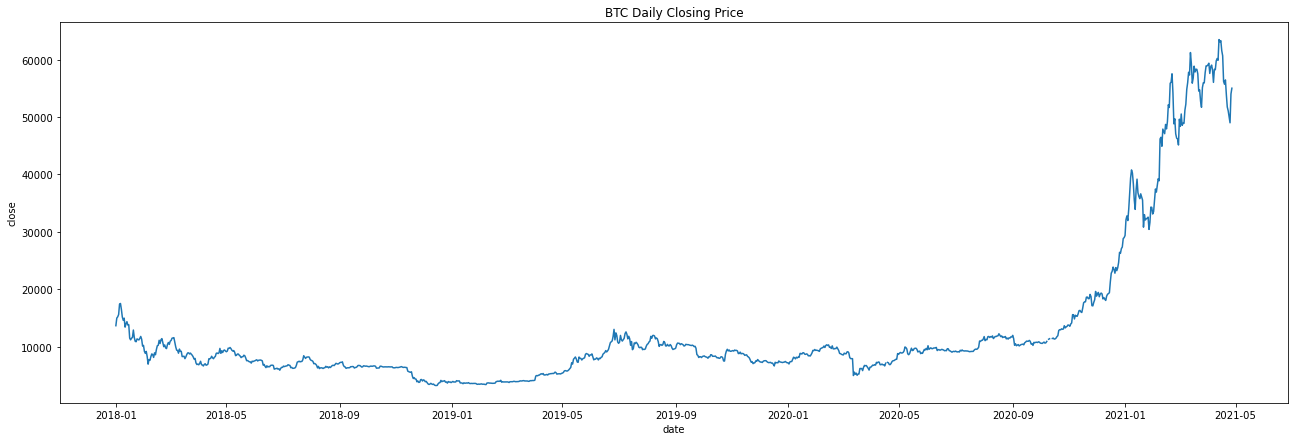

In [42]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date',y='close',data=btc_data)
ax.set_title('BTC Daily Closing Price')

Text(0.5, 1.0, 'ETH Daily Closing Price')

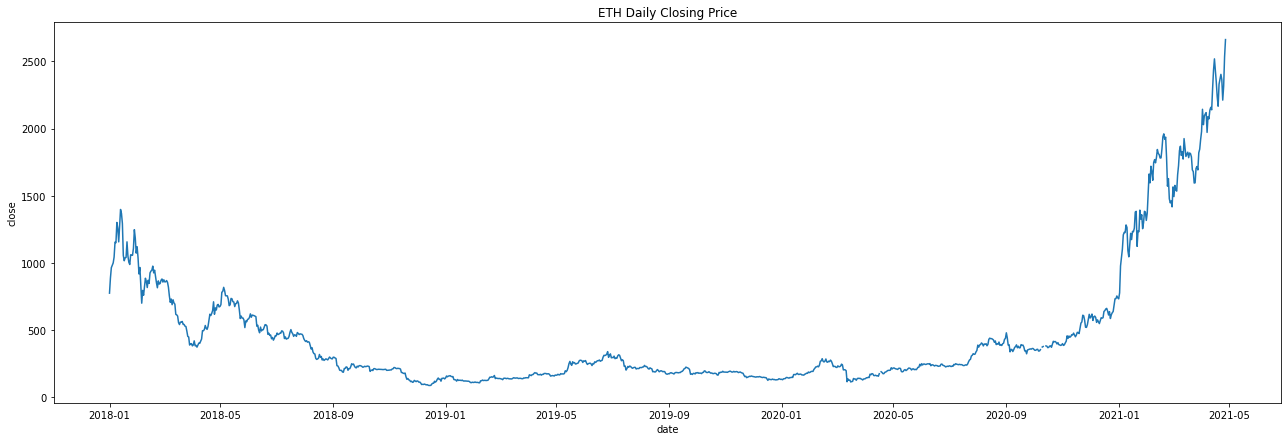

In [43]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date',y='close',data=eth_data)
ax.set_title('ETH Daily Closing Price')

Text(0.5, 1.0, 'DOGE Daily Closing Price')

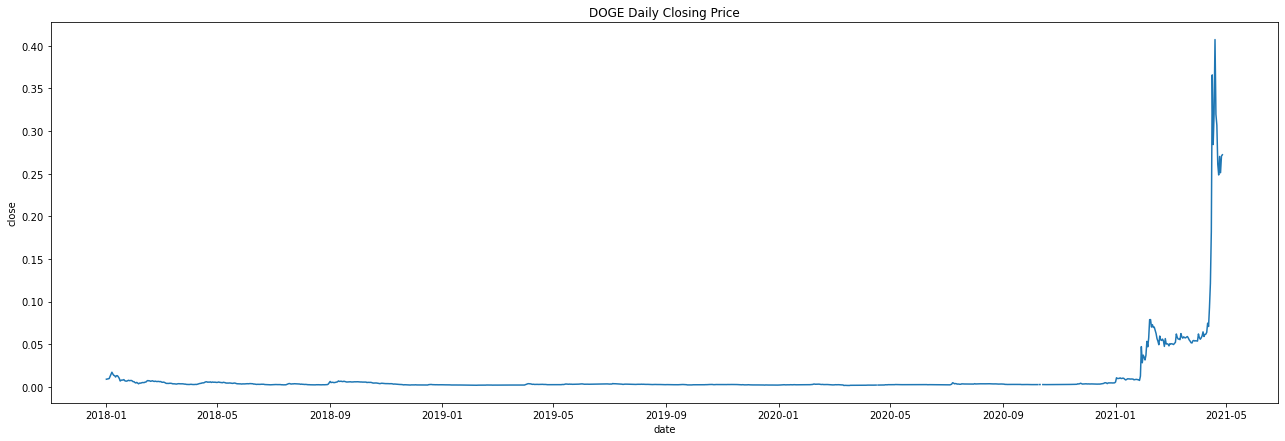

In [44]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date',y='close',data=doge_data)
ax.set_title('DOGE Daily Closing Price')

Text(0.5, 1.0, 'XRP Daily Closing Price')

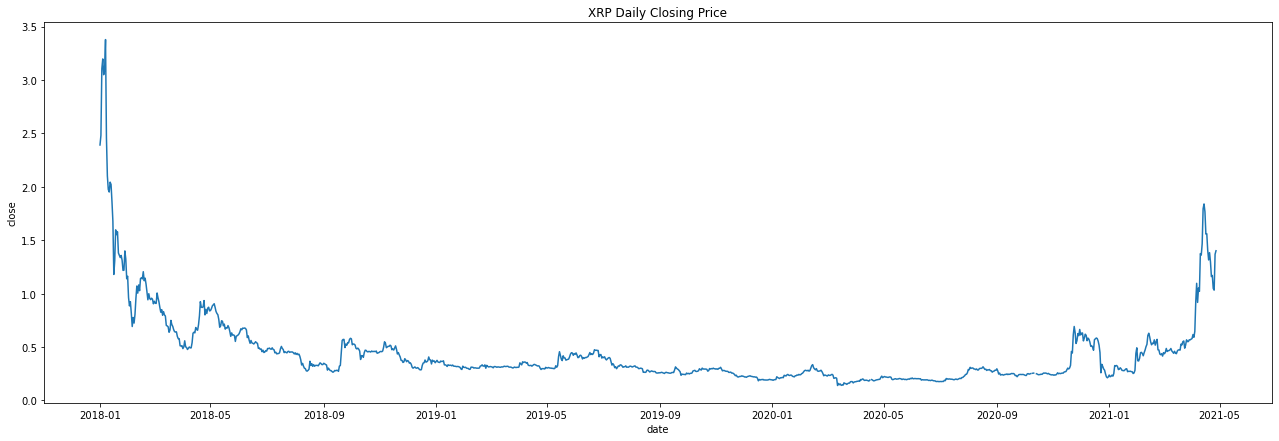

In [45]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date',y='close',data=xrp_data)
ax.set_title('XRP Daily Closing Price')

We can see that the graphs of crypto currency prices appears to be bimodal with a large drop in price in early 2018 and a large spike in early 2021. Despite this the spike in 2021 appears to be far larger than any of the others.

### When do crypto prices change the most?

In [46]:
btc_data.sort_values(by='percent_price_change')

,date,open,high,low,close,adj_close,volume,price_change,percent_price_change
801,2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,5.398036e+10,-2942.828125,-0.371869
15,2018-01-16,13836.099609,13843.099609,10194.900391,11490.500000,11490.500000,1.885380e+10,-2345.599609,-0.169528
35,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,6955.270020,9.285290e+09,-1315.270019,-0.159031
542,2019-06-27,13017.125000,13311.144531,10491.852539,11182.806641,11182.806641,3.997748e+10,-1834.318359,-0.140916
322,2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7.039560e+09,-749.289551,-0.133307
...,...,...,...,...,...,...,...,...,...
1134,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,1.014672e+11,7309.636719,0.187972
837,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date', ylabel='percent_price_change'>

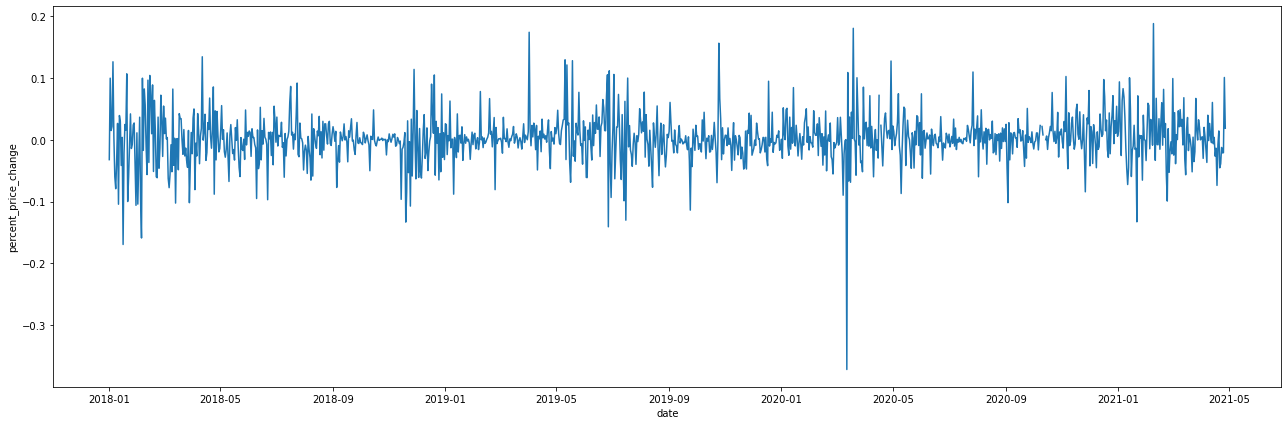

In [47]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=btc_data, x='date', y='percent_price_change')

In [48]:
eth_data.sort_values(by='percent_price_change')

,date,open,high,low,close,adj_close,volume,price_change,percent_price_change
801,2020-03-12,194.738922,195.147934,111.210709,112.347122,112.347122,2.213474e+10,-82.391800,-0.423089
1116,2021-01-21,1382.684448,1382.684448,1098.476196,1121.570923,1121.570923,4.593246e+10,-261.113525,-0.188845
247,2018-09-05,286.045013,288.162994,232.330994,232.330994,232.330994,2.390390e+09,-53.714019,-0.187782
15,2018-01-16,1292.630005,1292.630005,875.544983,1053.689941,1053.689941,8.405140e+09,-238.940064,-0.184848
631,2019-09-24,201.842087,203.500549,162.727783,168.110733,168.110733,1.175774e+10,-33.731354,-0.167118
...,...,...,...,...,...,...,...,...,...
1098,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,4.520046e+10,200.995849,0.259513
837,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date', ylabel='percent_price_change'>

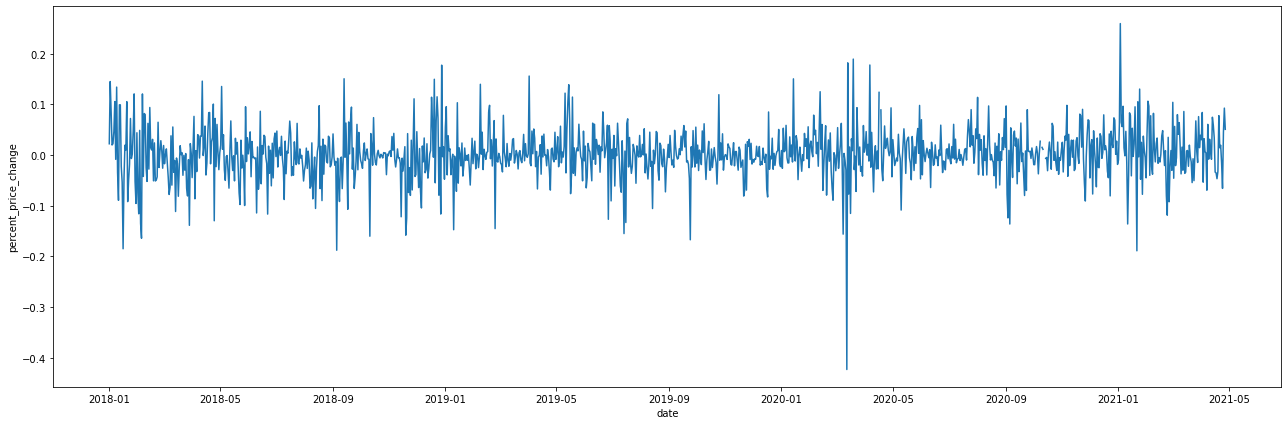

In [49]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=eth_data, x='date', y='percent_price_change')

In [50]:
doge_data.sort_values(by='percent_price_change')

,date,open,high,low,close,adj_close,volume,price_change,percent_price_change
1125,2021-01-30,0.046803,0.049901,0.022488,0.028176,0.028176,8.735577e+09,-0.018627,-0.397987
15,2018-01-16,0.009863,0.009863,0.005672,0.006822,0.006822,6.809920e+07,-0.003041,-0.308324
801,2020-03-12,0.002183,0.002188,0.001535,0.001537,0.001537,1.678928e+08,-0.000646,-0.295923
1202,2021-04-17,0.366098,0.374455,0.236524,0.284173,0.284173,3.141340e+10,-0.081925,-0.223779
1205,2021-04-20,0.408435,0.422347,0.271618,0.319500,0.319500,2.813065e+10,-0.088935,-0.217746
...,...,...,...,...,...,...,...,...,...
1201,2021-04-16,0.181587,0.437700,0.180488,0.365870,0.365870,6.941068e+10,0.184283,1.014847
837,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date', ylabel='percent_price_change'>

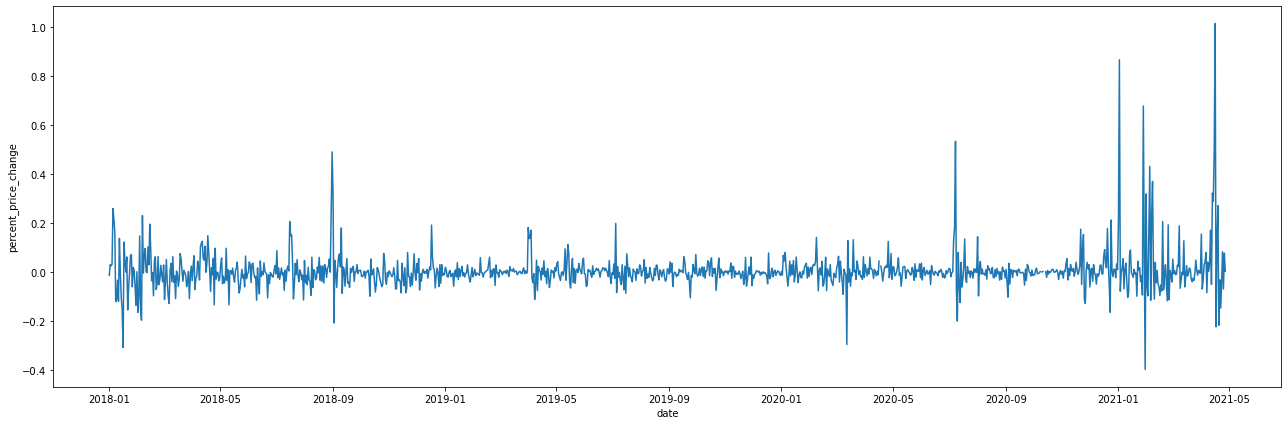

In [51]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=doge_data, x='date', y='percent_price_change')

In [52]:
xrp_data.sort_values(by='percent_price_change')

,date,open,high,low,close,adj_close,volume,price_change,percent_price_change
1087,2020-12-23,0.447966,0.447966,0.221363,0.258602,0.258602,1.979348e+10,-0.189364,-0.422720
801,2020-03-12,0.208205,0.209124,0.139635,0.139635,0.139635,3.547958e+09,-0.068570,-0.329339
15,2018-01-16,1.678360,1.701380,0.909313,1.179240,1.179240,5.687960e+09,-0.499120,-0.297386
7,2018-01-08,3.363570,3.363570,2.065520,2.456210,2.456210,3.315260e+09,-0.907360,-0.269761
1127,2021-02-01,0.492512,0.744821,0.360693,0.371509,0.371509,3.497423e+10,-0.121003,-0.245685
...,...,...,...,...,...,...,...,...,...
1125,2021-01-30,0.282152,0.489346,0.279825,0.440244,0.440244,2.441747e+10,0.158092,0.560308
837,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date', ylabel='percent_price_change'>

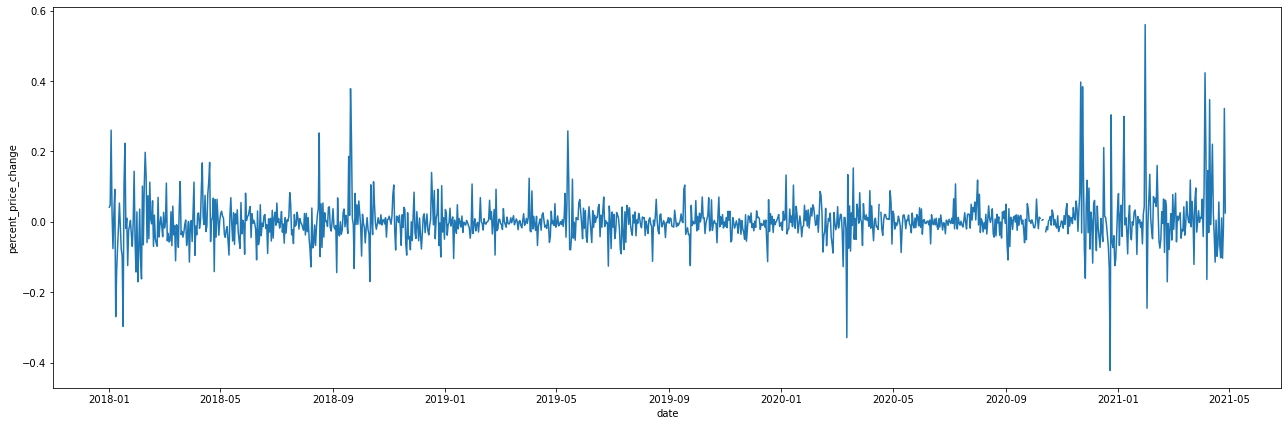

In [53]:
fig_dims = (22,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=xrp_data, x='date', y='percent_price_change')

While it is hard to tell right off the bat there definetly appear to be times when the prices of all four crypto currencies move together. These are the dates we would be interested in examining. In addition, while the crypto prices seems to be pretty voilitle across all three years, a basic visual inspection makes it seem like their prices have become more volitile recently.

In [54]:
#There are 39 total days where the price of BTC changed by more than 10% in a single day.
btc_10 = btc_data[abs(btc_data.get('percent_price_change')) > .1]
btc_10.shape

(39, 9)

In [55]:
#There are 69 total days where the price of BTC changed by more than 10% in a single day.
eth_10 = eth_data[abs(eth_data.get('percent_price_change')) > .1]
eth_10.shape

(69, 9)

In [56]:
#There are 69 total days where the price of BTC changed by more than 10% in a single day.
doge_10 = doge_data[abs(doge_data.get('percent_price_change')) > .1]
doge_10.shape

(102, 9)

In [57]:
#There are 93 total days where the price of BTC changed by more than 10% in a single day.
xrp_10 = xrp_data[abs(xrp_data.get('percent_price_change')) > .1]
xrp_10.shape

(93, 9)

In [58]:
#intersting, so there were a total of 11 different days since early 2018 where all 4 crypto currencies had their
#prices change by greater than 10%

frames = [btc_10, eth_10, doge_10, xrp_10]
combined_10 = pd.concat(frames).groupby('date').count()
combined_10 = combined_10[combined_10.get('open') >= 4].reset_index().sort_values(by='date')
combined_10 = pd.DataFrame(combined_10, columns=['date'])
combined_10;

In [59]:
btc_change = btc_data.merge(combined_10, on='date').assign(name='btc')
xrp_change = xrp_data.merge(combined_10, on='date').assign(name='xrp')
eth_change = eth_data.merge(combined_10, on='date').assign(name='eth')
doge_change = doge_data.merge(combined_10, on='date').assign(name='doge')

In [60]:
frames = [btc_change, xrp_change, eth_change, doge_change]
crypto_change_10 = pd.concat(frames).groupby(['date', 'name']).max()
crypto_change_10

open          high           low         close  \
date       name                                                           
2018-01-16 btc   13836.099609  13843.099609  10194.900391  11490.500000   
           doge      0.009863      0.009863      0.005672      0.006822   
           eth    1292.630005   1292.630005    875.544983   1053.689941   
           xrp       1.678360      1.701380      0.909313      1.179240   
2018-02-05 btc    8270.540039   8364.839844   6756.680176   6955.270020   
           doge      0.004397      0.004470      0.003376      0.003533   
           eth     834.958008    856.645996    644.598999    697.950989   
           xrp       0.825943      0.833866      0.675827      0.691799   
2018-03-14 btc    9214.650391   9355.849609   8068.589844   8269.809570   
           doge      0.003954      0.004018      0.003423      0.003524   
           eth     691.218994    702.783997    594.099976    614.291016   
           xrp       0.789569      0.799080      0.676010      0.701902   
2018-03-29 btc    7979.069824   7994.330078   7081.379883   7165.700195   
           doge      0.003171      0.003177      0.002758      0.002827   
           eth     448.075012    450.812988    385.812988    385.967987   
           xrp       0.577767      0.578640      0.511511      0.511511   
2018-04-12 btc    6955.379883   7899.229980   6806.509766   7889.250000   
           doge      0.003374      0.003798      0.003255      0.003798   
           eth     430.161011    493.058014    417.412994    492.941010   
           xrp       0.538657      0.644518      0.506543      0.628737   
2019-04-02 btc    4156.919434   4905.954590   4155.316895   4879.877930   
           doge      0.002459      0.002863      0.002394      0.002795   
           eth     141.839523    165.226822    141.636459    163.961746   
           xrp       0.312805      0.355870      0.312001      0.351499   
2019-09-24 btc    9729.321289   9804.317383   8370.801758   8620.566406   
           doge      0.002489      0.002502      0.002077      0.002228   
           eth     201.842087    203.500549    162.727783    168.110733   
           xrp       0.268686      0.272868      0.227052      0.235226   
2020-03-12 btc    7913.616211   7929.116211   4860.354004   4970.788086   
           doge      0.002183      0.002188      0.001535      0.001537   
           eth     194.738922    195.147934    111.210709    112.347122   
           xrp       0.208205      0.209124      0.139635      0.139635   
2020-03-13 btc    5017.831055   5838.114746   4106.980957   5563.707031   
           doge      0.001540      0.001799      0.001247      0.001738   
           eth     112.689995    137.429535     95.184303    133.201813   
           xrp       0.140524      0.164772      0.115093      0.159352   
2020-03-19 btc    5245.416504   6329.735840   5236.968750   6191.192871   
           doge      0.001566      0.001844      0.001562      0.001773   
           eth     114.839828    140.527725    114.732864    136.593857   
           xrp       0.143159      0.170475      0.143130      0.165037   
2020-09-03 btc   11407.191406  11443.022461  10182.464844  10245.296875   
           doge      0.003122      0.003134      0.002790      0.002802   
           eth     440.239990    449.532471    381.129700    385.671936   
           xrp       0.276636      0.276726      0.245419      0.246580   

                    adj_close        volume  price_change  \
date       name                                             
2018-01-16 btc   11490.500000  1.885380e+10  -2345.599609   
           doge      0.006822  6.809920e+07     -0.003041   
           eth    1053.689941  8.405140e+09   -238.940064   
           xrp       1.179240  5.687960e+09     -0.499120   
2018-02-05 btc    6955.270020  9.285290e+09  -1315.270019   
           doge      0.003533  1.248940e+07     -0.000864   
           eth     697.950989  4.269530e+09   -137.007019   
           xrp       0.69

<AxesSubplot:xlabel='date', ylabel='percent_price_change'>

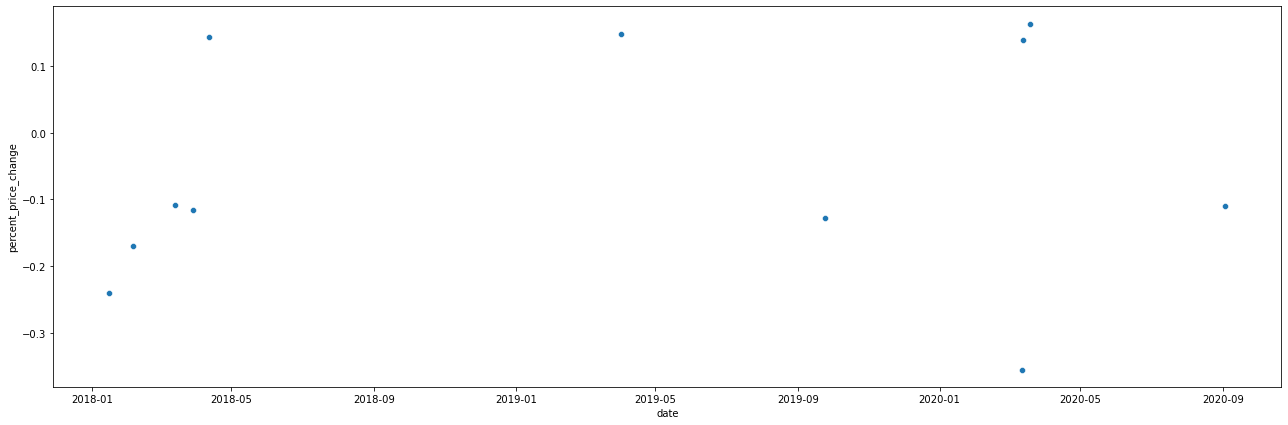

In [61]:
#need to figure out a better way to visualize this. but this effectively shows the average percent change that
#all four currencies went through on days where all their values changed by >= 10%
#graph is buggy now, though; plotting from 2000 to 2020 when we only have data 2018+
temp = crypto_change_10.reset_index().groupby('date').mean().reset_index()
g_dims = (22,7)
g, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=temp, x='date', y='percent_price_change')

In [143]:
big_change_dates = crypto_change_10.reset_index().groupby('date').count().reset_index()
big_change_dates = pd.DataFrame(big_change_dates.get('date'))
big_change_dates;

In [148]:
big_change_tweets = big_change_dates.merge(tweets, left_on='date', right_on='date')
big_change_tweets.head()

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2018-01-16,35 Insane Behind-The-Scenes Secrets About The ...,953343325226110976,Mark Cuban,35,106,428,28,2018,1,16,19:08:55
1,2018-01-16,"The #Crypto crash continues. Interestingly, Ja...",953384007533817856,Bespoke Crypto,1,9,12,1,2018,1,16,21:50:35
2,2018-01-16,Updated #Bitcoin + #Ethereum energy consumptio...,953281684891471880,Bespoke Crypto,0,0,0,0,2018,1,16,15:03:59
3,2018-01-16,"Here's an updated #bitcoin ""bubble chart"". Cur...",953275011695079425,Bespoke Crypto,1,5,5,0,2018,1,16,14:37:28
4,2018-01-16,Pretty big #crypto crash this morning. \r\n\r\...,953267604067639296,Bespoke Crypto,0,2,0,1,2018,1,16,14:08:02


In [149]:
big_change_tweets.groupby(by=['date','user']).count()

content  id  reply_count  retweet_count  \
date       user                                                      
2018-01-16 Bespoke Crypto        4   4            4              4   
           Mark Cuban            1   1            1              1   
2018-02-05 Bespoke Crypto        5   5            5              5   
           Elon Musk             9   9            9              9   
2018-03-14 Elon Musk             6   6            6              6   
           Mark Cuban            1   1            1              1   
           VLAD                  1   1            1              1   
2018-03-29 jack                  2   2            2              2   
2018-04-12 Elon Musk             2   2            2              2   
2019-04-02 Elon Musk             8   8            8              8   
           Mark Cuban            1   1            1              1   
           jack                  5   5            5              5   
2019-09-24 Elon Musk            18  18           18             18   
2020-03-12 Elon Musk             1   1            1              1   
           jack                  1   1            1              1   
2020-03-13 Mark Cuban            3   3            3              3   
           jack                  1   1            1              1   
2020-03-19 Elon Musk            22  22           22             22   
           Mark Cuban            3   3            3              3   
           jack                  5   5            5              5   
2020-09-03 Elon Musk             4   4            4              4   
           jack                  4   4            4              4   

                           like_count  quote_count  year  month  day  time  
date       user                                                             
2018-01-16 Bespoke Crypto           4            4     4      4    4     4  
           Mark Cuban               1            1     1      1    1     1  
2018-02-05 Bespoke Crypto           5            5     5      5    5     5  
           Elon Musk                9            9     9      9    9     9  
2018-03-14 Elon Musk                6            6     6      6    6     6  
           Mark Cuban               1            1     1      1    1     1  
           VLAD                     1            1     1      1    1     1  
2018-03-29 jack                     2            2     2      2    2     2  
2018-04-12 Elon Musk                2            2     2      2    2     2  
2019-04-02 Elon Musk                8            8     8      8    8     8  
           Mark Cuban               1            1     1      1    1     1  
           jack                     5            5     5      5    5     5  
2019-09-24 Elon Musk               18           18    18     18   18    18  
2020-03-12 Elon Musk                1            1     1      1    1     1  
           jack                     1            1     1      1    1     1  
2020-03-13 Mark Cuban               3            3     3      3    3     3  
           jack                     1            1     1      1    1     1  
2020-03-19 Elon Musk               22           22    22     22   22    22  
           Mark Cuban               3            3     3      3    3     3  
           jack                     5            5     5      5    5     5  
2020-09-03 Elon Musk                4            4     4      4    4     4  
           jack                     4            4     4      4    4     4

Here we can see every tweet made by our choosen influencers on the days of extreme volitily in the crypto market. Elon Musk is particularly active on theses days compared to other users. We will move on to preforming analysis on these tweets to determine if they are related to the cryptocurrency market at all. This analysis is not intended to prove corrleation or causation, but is simply exploratory to explore any relationship that would pave the way for future analysis.

## Sentiment Analysis

Now we'll move into some text analysis. I do both text analysis and sentiment analysis, although (as you will see) the sentiment analysis works far better for what we want to be exploring. Thus that is what we've titled this section.

In [62]:
#import natural language toolkit
import nltk


# download desired packages (is this what they're called?) from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

#Freqdist is optional since it doesn't actually do any word sorting. It's visualization.
#But what's better than visualization in EDA, right?
from nltk.probability import FreqDist
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drake\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Drake\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Drake\AppData\Roaming\nltk_data...


In [63]:
elon_musk_tweets.head()

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2021-05-03,@MeetLuis @WARREZ420 @WholeMarsBlog Rawlinson ...,1389270326073253889,Elon Musk,368,219,2281,100,2021,5,3,17:27:11
1,2021-05-03,@spacex360 So great to see the happy faces!,1389126650508480512,Elon Musk,774,943,29807,42,2021,5,3,07:56:16
2,2021-05-03,"@utsavtechie Prototypes are easy, production i...",1389102532706848768,Elon Musk,2791,8029,159645,648,2021,5,3,06:20:26
3,2021-05-02,@heydave7 @Tesla A remarkable junction in history,1388980879175954433,Elon Musk,918,865,16742,71,2021,5,2,22:17:02
4,2021-05-02,@jaentwistle One of many reasons why we need l...,1388963849043419140,Elon Musk,1152,1474,32663,78,2021,5,2,21:09:21


In [64]:
elon_musk_tweets.isnull().sum() #sweet, data checkpoint did it's job

date             0
content          0
id               0
user             0
reply_count      0
retweet_count    0
like_count       0
quote_count      0
year             0
month            0
day              0
time             0
dtype: int64

### Example
I want to start by understanding the process of basic sentiment analysis on a single tweet.

Our tweet: "@spacex360 So great to see the happy faces!" This seems quite positive, hopefully VADER will think so.

In [65]:
#example: 1 tweet; this is the tweet we'll use
print(elon_musk_tweets.loc[1,'content'])

@spacex360 So great to see the happy faces!


In [66]:
#example: 1 tweet
tokenized_tweet = word_tokenize(elon_musk_tweets.loc[1,'content'])
tokenized_tweet
#interesting, it splits the punctuation (!, @) into their own tokens, too.

['@', 'spacex360', 'So', 'great', 'to', 'see', 'the', 'happy', 'faces', '!']

In [67]:
#set stop words
stop_words = set(stopwords.words('english'))
stop_words
#note we may want to find a way to put some other stop words in here. We probably don't need the @'s, for example'

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [68]:
#remove stop words
for w in tokenized_tweet:
    if w in stop_words:
        tokenized_tweet.remove(w)
print(tokenized_tweet)
#it worked!

['@', 'spacex360', 'So', 'great', 'see', 'happy', 'faces', '!']


In [69]:
#get stems for all words
stemmed_tweet = []
for w in tokenized_tweet:
    stemmed_tweet.append(ps.stem(w))
stemmed_tweet

['@', 'spacex360', 'So', 'great', 'see', 'happi', 'face', '!']

In [70]:
#sentiment analysis!
#note you can't get the polarity score of a list itself; you have look at every individual item
#but analyzing a cleaned sentence would just give you something like this
analysed_tweet = []
for w in stemmed_tweet:
    analysed_tweet.append(analyser.polarity_scores(w))
analysed_tweet

[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]

In [71]:
#This is what confuses me, though:
#I can just analyse the entire text of the tweet
#so what is the point of doing the rest of everything that I did?
analyser.polarity_scores(elon_musk_tweets.loc[1,'content'])
#at least this looks quite positive

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.855}

In [72]:
#one last question: does the @ matter?
test1 = analyser.polarity_scores('So great to see the happy faces!')
test2 = analyser.polarity_scores('hahaha So great to see the happy faces!')
test3 = analyser.polarity_scores('@hahaha So great to see the happy faces!')
print(test1['compound'], test2['compound'], test3['compound'])
#no, it seems that the @ doesn't matter

0.855 0.9183 0.855


#### What we see so far:
- It doesn't seem like all the work that was done to tokenize and remove words from the original sentences actually does anything for sentiment analysis. At the very least, the polarity scores function doesn't play nicely with it. Perhaps this is worth asking about.
- Vader ignores anything with an @ attached to it, which is kind of nice for not having to split up words.

### Actual Sorting

With everything I've just learned, it seems like best course of action is just to analyse all of the sentences. Then we can use the other text stuff above, such as tokenization, if we want to look for specific words (and maybe other uses?).

In [73]:
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [74]:
#note that this takes quite a while, ~15-30 seconds, to run.
elon_tweets_list = list(elon_musk_tweets['content'].values)
elon_sentiments = get_sentiments(elon_tweets_list)

In [75]:
#change by Rohit
elon_sentiments['date'] = elon_musk_tweets['date']

In [76]:
#look at some overwhelmingly positive and negative tweets
elon_sentiments.sort_values('compound', ascending = False)

,compound,neg,neu,pos,sentence,date
6645,0.9787,0.027,0.563,0.410,"@krp5 @vincent13031925 No, it’s cumulative, bu...",2019-03-22
7884,0.9719,0.000,0.600,0.400,"@DMC_Ryan Wow, thanks for offering to help! Th...",2018-09-22
7036,0.9698,0.000,0.558,0.442,@business Super appreciate Deepak’s 11 year hi...,2019-01-31
8063,0.9688,0.000,0.547,0.453,Great Q&amp;A @defcon last night. Thanks for h...,2018-08-11
7768,0.9687,0.000,0.630,0.370,"@ajmarquez True, but this will improve dramati...",2018-10-17
...,...,...,...,...,...,...
9246,-0.9454,0.305,0.695,0.000,"Tesla Goes Bankrupt\r\nPalo Alto, California, ...",2018-04-01
2814,-0.9475,0.359,0.641,0.000,@GerberKawasaki @Tesla (Formerly) mainstream m...,2020-06-10
8626,-0.9493,0.288,0.684,0.028,@TheSithSeth @doctorow I’m not against all uni...,2018-06-17
7556,-0.9538,0.296,0.672,0.032,We know we’ll run out of dead dinosaurs to min...,2018-11-10


In [77]:
#a few examples:
elon_sentiments.iloc[6645, 4]

'@krp5 @vincent13031925 No, it’s cumulative, but once you win one of the prizes, referral count resets to zero &amp; you can’t win that prize again. Intent over time is to enable those without a massive social media presence to win.'

In [78]:
elon_sentiments.iloc[7884, 4]

'@DMC_Ryan Wow, thanks for offering to help! The coming week is incredibly intense. If any current Tesla owners who’d like to help educate new owners could head to Tesla delivery centers during midday on Sat/Sun &amp; morning/evening on weekdays, that would be super appreciated!'

In [79]:
elon_sentiments.iloc[7036, 4]

'@business Super appreciate Deepak’s 11 year history building Tesla &amp; wish him greatest of happiness in retirement! Zach has been outstanding over his 9 year history with Tesla &amp; will build upon Deepak’s legacy.'

In [80]:
elon_sentiments.sort_values('compound')

,compound,neg,neu,pos,sentence,date
6291,-0.9638,0.396,0.559,0.045,"@FredericLambert Fred, every fire *is* investi...",2019-04-23
7556,-0.9538,0.296,0.672,0.032,We know we’ll run out of dead dinosaurs to min...,2018-11-10
8626,-0.9493,0.288,0.684,0.028,@TheSithSeth @doctorow I’m not against all uni...,2018-06-17
2814,-0.9475,0.359,0.641,0.000,@GerberKawasaki @Tesla (Formerly) mainstream m...,2020-06-10
9246,-0.9454,0.305,0.695,0.000,"Tesla Goes Bankrupt\r\nPalo Alto, California, ...",2018-04-01
...,...,...,...,...,...,...
7768,0.9687,0.000,0.630,0.370,"@ajmarquez True, but this will improve dramati...",2018-10-17
8063,0.9688,0.000,0.547,0.453,Great Q&amp;A @defcon last night. Thanks for h...,2018-08-11
7036,0.9698,0.000,0.558,0.442,@business Super appreciate Deepak’s 11 year hi...,2019-01-31
7884,0.9719,0.000,0.600,0.400,"@DMC_Ryan Wow, thanks for offering to help! Th...",2018-09-22


In [81]:
elon_sentiments.iloc[6291, 4]

'@FredericLambert Fred, every fire *is* investigated. Problem is those who only write about 0 injury Tesla fires while ignoring fatal combustion car fires or fail to mention any contextual statistics in their article, misleading readers into thinking EV’s have high fire risk when opposite is true.'

In [82]:
elon_sentiments.iloc[7556, 4]

'We know we’ll run out of dead dinosaurs to mine for fuel &amp; have to use sustainable energy eventually, so why not go renewable now &amp; avoid increasing risk of climate catastrophe? Betting that science is wrong &amp; oil companies are right is the dumbest experiment in history by far … https://t.co/TvyuDBf3lR'

In [83]:
elon_sentiments.iloc[8626, 4]

'@TheSithSeth @doctorow I’m not against all unions, but UAW has a track record of destroying productivity so a company can’t compete on world market. Our current factory went bankrupt under UAW before we took it over. Don’t want Tesla to die too.'

In [84]:
#it seems like the negative tweets are a little more inflamatory than the positive ones, so I'll start here.
elon_neg = elon_sentiments.sort_values('compound').reset_index()
elon_neg.head()

,index,compound,neg,neu,pos,sentence,date
0,6291,-0.9638,0.396,0.559,0.045,"@FredericLambert Fred, every fire *is* investi...",2019-04-23
1,7556,-0.9538,0.296,0.672,0.032,We know we’ll run out of dead dinosaurs to min...,2018-11-10
2,8626,-0.9493,0.288,0.684,0.028,@TheSithSeth @doctorow I’m not against all uni...,2018-06-17
3,2814,-0.9475,0.359,0.641,0.000,@GerberKawasaki @Tesla (Formerly) mainstream m...,2020-06-10
4,9246,-0.9454,0.305,0.695,0.000,"Tesla Goes Bankrupt\r\nPalo Alto, California, ...",2018-04-01


In [85]:
#perhaps next: look through tweets for specific words like bitcoin, dogecoin, stock, etc.
#filter elon_neg to only include top 100 neg tweets.

In [86]:
elon_neg[elon_neg['sentence'].str.contains('bitcoin|Bitcoin')]

,index,compound,neg,neu,pos,sentence,date
592,398,-0.3802,0.206,0.794,0.000,BTC (Bitcoin) is an anagram of\r\nTBC(The Bori...,2021-03-12
866,52,-0.2960,0.064,0.936,0.000,"@stoolpresidente No, you do not. I have not so...",2021-04-26
986,564,-0.2500,0.122,0.775,0.103,"@business To be clear, I am *not* an investor,...",2021-02-19
1112,565,-0.1548,0.090,0.838,0.072,@business Tesla’s action is not directly refle...,2021-02-19
1235,316,-0.1027,0.135,0.865,0.000,Pay by Bitcoin capability available outside US...,2021-03-24
1861,3215,0.0000,0.000,1.000,0.000,@Bitcoin How much for some anime Bitcoin? http...,2020-05-01
1868,3217,0.0000,0.000,1.000,0.000,@Bitcoin 🤣🤣,2020-05-01
2559,4249,0.0000,0.000,1.000,0.000,@bitcoin2020conf 😉,2020-01-10
3063,1017,0.0000,0.000,1.000,0.000,Bitcoin is almost as bs as fiat money,2020-12-20
3473,1235,0.0000,0.000,1.000,0.000,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,2020-11-16


In [87]:
#we're really interested in phrases such as this one, but sadly it was listed as 100% neutral and thus had 0 compound.
#would be very cool to look at the price trend of bitcoin a few days before and after this post
elon_musk_tweets.loc[1017, :]

date                               2020-12-20 00:00:00
content          Bitcoin is almost as bs as fiat money
id                                 1340588909974200321
user                                         Elon Musk
reply_count                                       8176
retweet_count                                     9975
like_count                                      139704
quote_count                                       3525
year                                              2020
month                                               12
day                                                 20
time                                          09:24:37
Name: 1017, dtype: object

In [88]:
#Many of these are talking about stocks but quite a few are talking about stocking stores.
#A shame we can't use analytical machine learning here (or that we don't know how)
elon_neg[elon_neg['sentence'].str.contains('stock|stocks')]

,index,compound,neg,neu,pos,sentence,date
134,730,-0.6800,0.166,0.779,0.055,u can’t sell houses u don’t own\r\nu can’t sel...,2021-01-28
473,7845,-0.4357,0.134,0.813,0.053,@dlauer @KishavanBhola @enn_nafnlaus @ElonBach...,2018-10-05
477,7318,-0.4341,0.137,0.863,0.000,@DeadstockNYC Reverse back down (using same ro...,2018-12-19
776,623,-0.2960,0.095,0.905,0.000,@SRuhle Everyone at Tesla receives stock. \r\n...,2021-02-09
869,7980,-0.2960,0.268,0.732,0.000,"@ebf No, service will stock all colors",2018-09-11
986,564,-0.2500,0.122,0.775,0.103,"@business To be clear, I am *not* an investor,...",2021-02-19
1048,1849,-0.2111,0.156,0.729,0.115,"@RBReich All Tesla workers also get stock, so ...",2020-09-09
1052,7865,-0.2041,0.201,0.665,0.134,@cleantechnica Something especially weird goin...,2018-10-02
1609,3234,0.0000,0.000,1.000,0.000,Tesla stock price is too high imo,2020-05-01
2938,4405,0.0000,0.000,1.000,0.000,stock art https://t.co/HSWnwK68OV,2019-12-23


In [89]:
#The lowest compounded tweet is probably actually a hype-up tweet, while most of the tweets have no sentiment.
elon_neg[elon_neg['sentence'].str.contains('doge|Doge')]

,index,compound,neg,neu,pos,sentence,date
175,679,-0.6369,0.674,0.326,0.000,"No highs, no lows, only Doge",2021-02-04
301,598,-0.5423,0.212,0.788,0.000,"Frodo was the underdoge,\r\nAll thought he wou...",2021-02-11
350,479,-0.5106,0.452,0.548,0.000,@draecomino 2022: Dogecoin is dumb,2021-03-02
622,388,-0.3612,0.093,0.853,0.054,Origin of Doge Day Afternoon:\r\nThe ancient R...,2021-03-13
705,626,-0.3291,0.142,0.772,0.087,"@itsALLrisky Doge appears to be inflationary, ...",2021-02-08
954,595,-0.2732,0.412,0.588,0.000,@gtera27 Doge is underestimated,2021-02-11
1561,6551,0.0000,0.000,1.000,0.000,@dogecoin Uh oh,2019-04-02
1701,3307,0.0000,0.000,1.000,0.000,@28delayslater @justpaulinelol Dogecoin Mode,2020-04-25
1825,6550,0.0000,0.000,1.000,0.000,Dogecoin rulz https://t.co/flWWUgAgLU,2019-04-02
3062,1016,0.0000,0.000,1.000,0.000,One word: Doge,2020-12-20


### Summary so far:

#### The Good
- We have a way to index the tweets for key words (multiple if you use |).
- This doesn't include any fancy text analysis, so what was the point of doing the earlier stuff?
- We can arrange and sort by rudimentary emotional valence (most or least positive words in order)

#### The Bad
- Basically: VADER isn't incredible for what we want. Perhaps we could find a different sorting algorithm?
- A lot of the quotes we are interested in go unnoticed due to their being labeled as very neutral. Sometimes this makes sense (e.g. 'doge day afternoon'), sometimes it doesn't ('Bitcoin is almost as bs as fiat money'). 
- Similarly, positive quotes are sometimes labeled as negative.
- We have to think of all the key words (and then pick out tweets of interest ourselves)

As we move into more analysis, I think it would be very cool to find tweets of interest and compare their date to price trends of crypto. In order for this to work, we'll have to think of some creative ways to visualize the cryptocurrencies, too.

As I mentioned above, the biggest issue with sentiment analysis at the moment is that it's not giving us what we want. We can't be systematic with the tweets we choose because most of the interesting tweets that I have seen have had 0 valence. Although it's not the end of the world if we check the tweets labeled very positive and negative to see if our hypothesis holds.

Another thing is that I have only looked at Musk's data so far. Maybe another person's tweets may be more manageable. I'll check that now.

In [90]:
mark_cuban_tweets.head()

,date,content,id,user,reply_count,retweet_count,like_count,quote_count,year,month,day,time
0,2021-05-03,@phkeane @ActionNetworkHQ congrats !,1389334908720586759,Mark Cuban,3,1,23,0,2021,5,3,21:43:49
1,2021-05-03,@harryhurst @pipe If you are saying there is n...,1389233740367400968,Mark Cuban,6,2,69,2,2021,5,3,15:01:49
2,2021-05-03,@harryhurst @pipe I get you are the market mak...,1389227351456813057,Mark Cuban,6,1,30,1,2021,5,3,14:36:25
3,2021-05-03,"@harryhurst @pipe We are fine, and i actually ...",1389212762832838665,Mark Cuban,6,1,65,2,2021,5,3,13:38:27
4,2021-05-03,@jmitch I think trustless with reward systems ...,1389088424548786177,Mark Cuban,3,5,37,4,2021,5,3,05:24:23


In [91]:
cuban_tweets_list = list(mark_cuban_tweets['content'].values)
cuban_sentiments = get_sentiments(cuban_tweets_list)
cuban_sentiments['date'] = mark_cuban_tweets['date']
cuban_sentiments

,compound,neg,neu,pos,sentence,date
0,0.5707,0.000,0.351,0.649,@phkeane @ActionNetworkHQ congrats !,2021-05-03
1,0.7268,0.162,0.578,0.260,@harryhurst @pipe If you are saying there is n...,2021-05-03
2,0.4939,0.038,0.868,0.094,@harryhurst @pipe I get you are the market mak...,2021-05-03
3,0.9677,0.000,0.635,0.365,"@harryhurst @pipe We are fine, and i actually ...",2021-05-03
4,0.2732,0.111,0.736,0.153,@jmitch I think trustless with reward systems ...,2021-05-03
...,...,...,...,...,...,...
2630,0.5423,0.000,0.222,0.778,Fascinating https://t.co/TswjOz8Xni,2018-01-03
2631,0.1280,0.000,0.842,0.158,Parade Exclusive: Bloopers From Shark Tank Sea...,2018-01-03
2632,0.6486,0.000,0.858,0.142,@DougMartin17 @SteveShea33 @bballbreakdown Mos...,2018-01-03
2633,-0.5859,0.257,0.577,0.166,@SteveShea33 @bballbreakdown The bigger proble...,2018-01-03


In [92]:
#I'll do it the same way (compound negative to positive) for consistency
cuban_neg = cuban_sentiments.sort_values('compound').reset_index()
cuban_neg.head()

,index,compound,neg,neu,pos,sentence,date
0,1158,-0.9345,0.297,0.649,0.053,@glsrbrown Shame. No. Guilt. Absolutely not. ...,2020-06-17
1,773,-0.9256,0.375,0.499,0.126,Could I be wrong about all the above ? Of cour...,2020-11-14
2,1025,-0.9246,0.233,0.725,0.042,You are so full of shit. You haven't watched a...,2020-10-06
3,245,-0.9231,0.233,0.767,0.000,"Finally, let me jump on my soap box: Most like...",2021-02-18
4,2342,-0.9163,0.334,0.581,0.085,If all content providers were required to have...,2019-04-17


In [93]:
#again, I can see why this is classified as very negative. But I'm not sure if I'd consider this negative
cuban_neg.iloc[0, 5]

"@glsrbrown Shame. No.  Guilt. Absolutely not. I want this to be an OPPORTUNITY for us to take steps to call out  racism when we see it.  Doesn't mean everyone is racist. But most white people  know someone who is. When we say something,  instead of ignoring it,  we move this country forward"

In [94]:
cuban_doge = cuban_neg[cuban_neg['sentence'].str.contains('doge|Doge')]

In [95]:
#this one could be interesting. Maybe we would have some success by taking significantly pos/negative tweets.
cuban_neg.iloc[2627, 5]

"To all you people getting all excitable about #Doge. Relax.  It's Fantasy Sports for Crypto.  It's fun to play with. The communities that have been built around it are fun.  Like Sports, Fantasy or Otherwise, some people go overboard. It Happens.  Be Young. Have Fun #DogecoinRise"

# Plotting Time Series of Crypto Price Change
Let's take a look at the trends between the different crypto assets over time. 
### Description
For this specific EDA, we are going to look at the time series for the four different cryptocurrency assets and their prices over time. This will give us a brief overview of how the prices have changed and at what point in recent years the price has risen.  

In [96]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

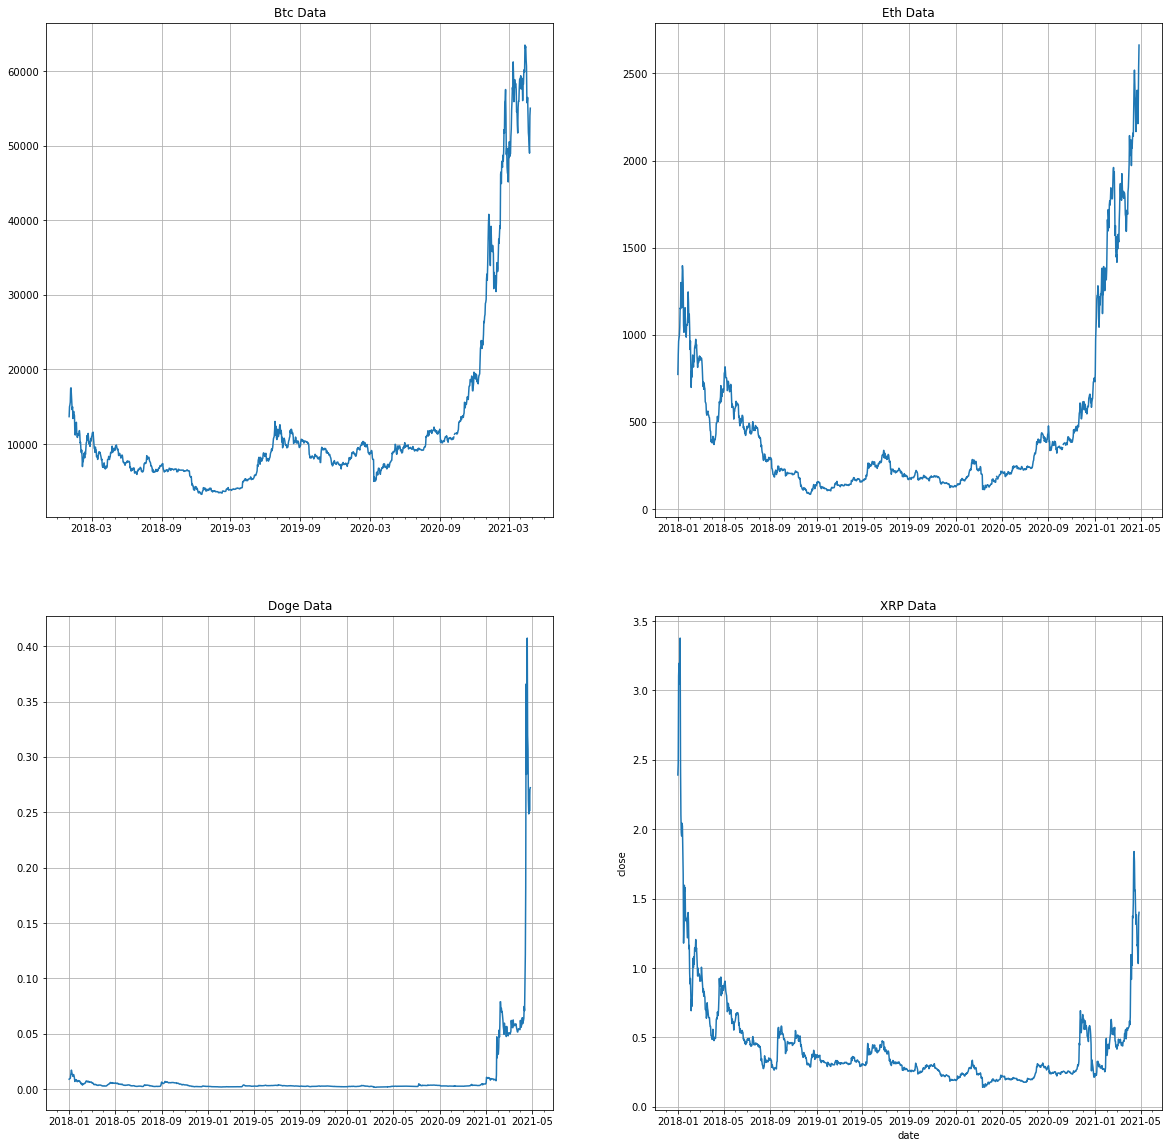

In [97]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax.plot(btc_data["date"],btc_data["close"])

ax2.plot(eth_data["date"],eth_data["close"])

ax3.plot(doge_data["date"],doge_data["close"])

ax4.plot(xrp_data["date"],xrp_data["close"])

ax.set_title('Btc Data')
ax2.set_title('Eth Data')
ax3.set_title('Doge Data')
ax4.set_title('XRP Data')

plt.xlabel("date")
plt.ylabel("close")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.set_minor_locator(fmt_month)
ax4.xaxis.set_minor_locator(fmt_month)

ax.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

Maybe let's find a better way to plot this. Need to format this a little better.

## Taking a Closer Look at Drastic Increases and Decreases

### BTC

In [98]:
btc_data.sort_values(by = 'percent_price_change', ascending = False)

,date,open,high,low,close,adj_close,volume,price_change,percent_price_change
1134,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,1.014672e+11,7309.636719,0.187972
808,2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,6191.192871,5.100073e+10,945.776367,0.180305
456,2019-04-02,4156.919434,4905.954590,4155.316895,4879.877930,4879.877930,2.131505e+10,722.958496,0.173917
662,2019-10-25,7490.703125,8691.540039,7479.984375,8660.700195,8660.700195,2.870507e+10,1169.997070,0.156193
101,2018-04-12,6955.379883,7899.229980,6806.509766,7889.250000,7889.250000,8.906250e+09,933.870117,0.134266
...,...,...,...,...,...,...,...,...,...
801,2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,5.398036e+10,-2942.828125,-0.371869
837,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
max_ppc = pd.to_datetime('2021-02-08')
elon_price_jump = elon_musk_tweets.loc[elon_musk_tweets['date'] == max_ppc]

In [100]:
#elon_tweets_list = list(elon_musk_tweets['content'].values)
#note in the future we should add a date column to the get sentiments function
#also want tweets from a few days surrounding this massive jump (probably after)
elon_jump_tweets = list(elon_price_jump['content'].values)
get_sentiments(elon_jump_tweets)

,compound,neg,neu,pos,sentence
0,0.0000,0.000,1.000,0.000,Back to work I go …
1,0.0000,0.000,1.000,0.000,@CapybaraSurfer @MattWallace888 Does seem a bi...
2,-0.3291,0.142,0.772,0.087,"@itsALLrisky Doge appears to be inflationary, ..."
3,0.5859,0.000,0.345,0.655,@MichaelGalanin @kevinmgill Wow
4,0.4404,0.000,0.873,0.127,@Erdayastronaut @michaelhodapp_ 1. Orbital lau...
5,0.0000,0.000,1.000,0.000,@michaelhodapp_ Back to work tonight!
6,0.0000,0.000,1.000,0.000,Ð is for Ðogecoin! Instructional video.\r\nhtt...
7,0.0000,0.000,1.000,0.000,The people have spoken … https://t.co/x41oVMzTGo


In [101]:
min_ppc = pd.to_datetime('2020-3-12')
elon_price_fall = elon_musk_tweets.loc[elon_musk_tweets['date'] == min_ppc]

In [102]:
elon_fall_tweets = list(elon_price_fall['content'].values)
get_sentiments(elon_fall_tweets)

,compound,neg,neu,pos,sentence
0,0.1027,0.282,0.403,0.315,@ThingsWork The Permian-Triassic was super bad...


In [103]:
#although we can't currently explore dates around a jump, we can explore prices around a tweet.
#Specifically this one:
elon_musk_tweets.loc[1017, :]

date                               2020-12-20 00:00:00
content          Bitcoin is almost as bs as fiat money
id                                 1340588909974200321
user                                         Elon Musk
reply_count                                       8176
retweet_count                                     9975
like_count                                      139704
quote_count                                       3525
year                                              2020
month                                               12
day                                                 20
time                                          09:24:37
Name: 1017, dtype: object

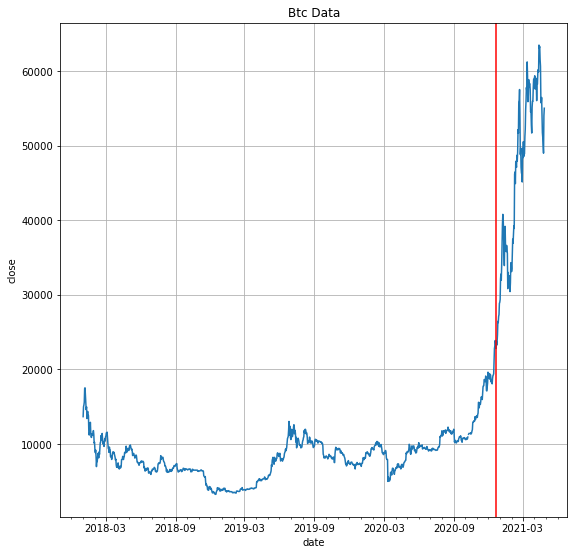

In [104]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(221)

ax.plot(btc_data["date"],btc_data["close"])

ax.set_title('Btc Data')

plt.xlabel("date")
plt.ylabel("close")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

ax.grid(True)

#ax.vlines(x = , ymin = 0, ymax = 1, colors='r', linestyles='solid')
tweet_date = '2020-12-20'
ax.axvline(pd.to_datetime(tweet_date), color = 'r');

It looks like he was angry about this steep rise

# Another Brief Summary (so far)
We've been able to generate a lot of interesting graphs from the crypto data (primarily line and scatter plot), and we did some sentiment analysis on the tweet datasets. 

We also found a very way to combine the visualization portions of our datasets above. We will work much more with combinations like these as we start to finalize our project.

Some things to keep in mind (that we found and expect for the future):
- Sentiment analysis only works so well, but we would still like to use it as a system of determining twitter user influence
- We want to look at tweets in a range around days with major price spikes or drops, not just the day of. Not everyone may react that day (especially since we look at closing prices)/
- We'd like to find an easier way to examine these then datetime, if possible, since it's given us a bit of trouble
- We have many datasets, but we typically only use a few. We have been spending much more time with bitcoin and doge than XRP or Ethereum, and more time with Musk and a couple other twitter users than all 6 we have. We may consider excluding some less-used datasets in the final rendition of our project so that we can have more in-depth analysis, such as the above.